## Chapter 5: Linear regression

# 5.7  The probabilistic perspective on Least Squares linear regression

In Section 8.1 we took a *geometric* perspective in deriving the Least Squares linear regression, but one can also think about this kind of regression from a *probabilistic* perspective as well (this is also true of the Least Absolute Deviations cost).  We offer this perspective here.  Note that this requires knowledge of additional probabilistic tools like distributions and maximum likelihood.

In [1]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import superlearn_library as superlearn

# demos for this notebook
regress_plotter = superlearn.regression_probabilistic_demos

# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# import timer
from datetime import datetime 

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

###  Assumption 1: geometric relationship

As we saw in subsection 8.1, to derive Least Squares probablistically we rely on the fundamental assumption that the relationship between input and output variables is (approximately) linear. That is, we have for all $P$ input/output pairs of data that

\begin{equation}
\mathring{\mathbf{x}}_{p}^T\mathbf{w} \approx \overset{\,}{y}_{p}.
\end{equation}

###  Assumption 2: noise distribution

In addition to the assumed linear relationship,we make an additional assumption on the 'noise' - that is the difference $\mathring{\mathbf{x}}_{p}^T\mathbf{w} - \overset{\,}{y}_{p}$.  Denoting the difference between $\overset{\,}{y}_{p}$ and $\mathring{\mathbf{x}}_{p}^T\mathbf{w}$ as $\varepsilon_p$, we can replace our *approximate* equalities with *exact* equalities of the form

\begin{equation}
\mathring{\mathbf{x}}_{p}^T\mathbf{w} +\overset{\,}{\varepsilon}_p^{\,} = \overset{\,}{y}_{p} ,\quad p=1,...,P
\end{equation}

where $\varepsilon_p$'s can be interpreted as error or noise in the data. With this new notation, the Least Squares cost for linear regression can be written, in terms of $\varepsilon_p$'s, as  

\begin{equation}
\,g\left(\mathbf{w}\right) = \frac{1}{P}\sum_{p=1}^{P}\left(\mathring{\mathbf{x}}_{p}^T\mathbf{w} - \overset{\,}{y}_{p}\right)^{2} = \frac{1}{P}\sum_{p=1}^{P} \overset{\,}{\varepsilon}_p^2
\end{equation}

Put into words, with linear regression we aim to find the parameters $w_0$ and $\mathbf{w}$ that minimize the total squared noise - a quantity that is referred to as *the noise energy* in signal processing contexts.

Now one might rightfully ask: what is the point of introducing $P$ new variables $\left\{ \varepsilon_p \right\} _{p=1}^{P}$ to our model when their values are unknown to begin with? While it is true that we do not know the exact $\varepsilon_p$ values, we can nonetheless make assumptions about their distribution that enable us to find $w_0$ and $\mathbf{w}$ (and $\varepsilon_p$'s successively) in a probabilistic framework.  Specifically we make the assumption that $\left\{ \varepsilon_p \right\} _{p=1}^{P}$ are drawn from a zero-mean Gaussian distribution.  In other words, we assume that the noise is normally distributed with an *expected value* of $0$. Before getting into why this assumption is necessary to make from a theoretical standpoint, let us examine its validity using a number of real regression datasets.  

#### <span style="color:#a50e3e;">Example 1: </span>  Rising sea levels 

In the ``Python`` cell below we plot both the Least Squares trend line fit to a dataset [[1]](#bib_cell) consisting of satellite measurements of global mean sea level changes on earth from 1993 to 2014 (left panel), as well as the estimated noise distribution according to the learned trend line (right panel).   

<IPython.core.display.Javascript object>


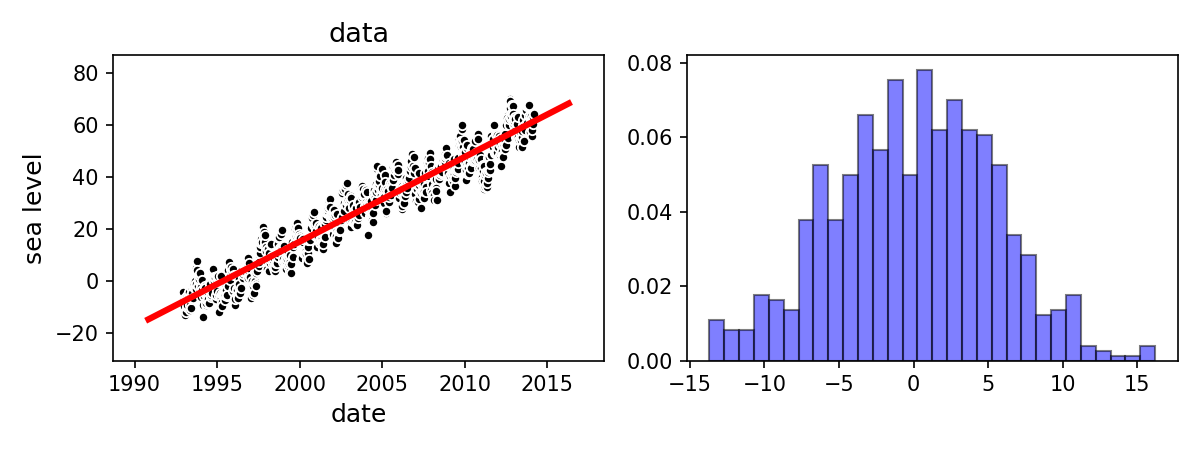

In [2]:
## This code cell will not be shown in the HTML version of this notebook
# load in dataset
datapath = '../../mlrefined_datasets/superlearn_datasets/climate_data.csv'
data = np.loadtxt(datapath,delimiter = ',')

# produce demo
demo = regress_plotter.Visualizer(data)

# solve Least Squares 
demo.run_algo(algo='newtons_method', w_init = np.random.randn(2,1), max_its = 1)

# visualize results
demo.error_hist(num_bins=30, xlabel='date', ylabel='sea level', show_pdf='on')

#### <span style="color:#a50e3e;">Example 2: </span> The relationship between the height of mother and the height of daughter 

As another example let us look at Francis Galton's height dataset, who collected this data in 1885 in an attempt to explore the relationship between the heights of the parents and the heights of their adult children. In ``Python`` cell below we plot the portion of Galton's dataset [[2]](#bib_cell) which connects the height of the mother (input) to the height of her daughter (output), once again plotted along with the error distribution on the right.  

<IPython.core.display.Javascript object>


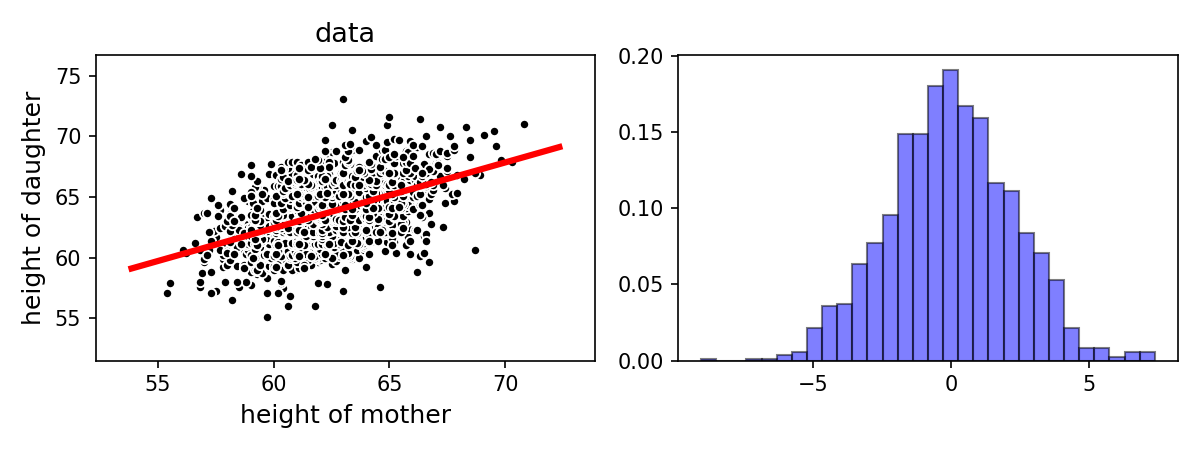

In [3]:
## This code cell will not be shown in the HTML version of this notebook
# load in dataset
datapath = '../../mlrefined_datasets/superlearn_datasets/mother_daughter.csv'
data = np.loadtxt(datapath,delimiter = ',')

# produce demo
demo = regress_plotter.Visualizer(data)

# solve Least Squares
demo.run_algo(algo='newtons_method', w_init = np.random.randn(2,1), max_its = 1)

# visualize results
demo.error_hist(num_bins = 30, xlabel='height of mother', ylabel='height of daughter', show_pdf='on')

In both cases as you can see it looks like that the noise does follow a zero-mean Gaussian distribution, and hence our assumption is not far-fetched.

Since we have $\overset{\,}{y}_{p} = \mathring{\mathbf{x}}_{p}^T\mathbf{w} +\varepsilon_p$ for all $p$, this means that, given the values of $\mathbf{x}_{p}$ and $\mathbf{w}$, each $y_p$ is also Gaussian with the same variance as the noise distribution - which we denote by $\sigma^2$ - and a (shifted) mean value of $\mathring{\mathbf{x}}_{p}^T\mathbf{w}$. Hence, with our first assumption, we have

\begin{equation}
{\cal P}\left(y=y_{p}\,|\,\mathbf{x}_{p},\mathbf{w}\right)=\frac{1}{\sqrt{2\pi}\,\sigma}e^{\,\frac{-1}{2\sigma^{2}}\left( \mathring{\mathbf{x}}_{p}^T\mathbf{w} - y_p\right)^{2}} ,\quad p=1,...,P
\end{equation}

Note: to derive the Least Absolute Deviations cost discussed in Section 8.2 we need only make a small change here: instead of a Gaussian distribution we use an *exponential* one.

###   Assumption 3: statistical independence

This brings us to the second theoretical assumption we make here, that $\left\{ y_p \right\} _{p=1}^{P}$ are statistically independent of each other.  In many cases it makes intuitive sense to assume that our observations are (or can be) made independently of one another other, as long as there is no temporal, spatial, or other kind of correlation in the data. 

With these three assumptions we can now form the (joint) likelihood of our data and maximize it to recover model parameters.  Specifically, using the independence assumption we can write the likelihood as

\begin{equation}
{\cal L}=\prod_{p=1}^{P}{\cal P}\left(y=y_{p}\,|\,\mathbf{x}_{p},\mathbf{w}\right)
\end{equation}  

Recall, as discussed in our series on *the fundamentals of probability and statistics*, that maximizing the likelihood is mathematically equivalent to minimizing its negative log-likelihood, giving the probabilistic cost function

\begin{equation}
g\left(\mathbf{w},\sigma\right)=-\sum_{p=1}^{P}\text{log}\,{\cal P}\left(y=y_{p}\,|\,\mathbf{x}_{p},\mathbf{w}\right)
\end{equation}  

to be minimized over $\mathbf{w}$, and the noise standard deviation $\sigma$. 

Our second assumption on the distribution of noise makes it possible to write the exact form of $g$, with some algebra, as 

\begin{equation}
g\left(\mathbf{w},\sigma\right)=P\,\text{log}\left(\sqrt{2\pi}\,\sigma\right)+\frac{1}{2\sigma^{2}}\sum_{p=1}^{P} \left(  \mathring{\mathbf{x}}_{p}^T\mathbf{w}-y_p\right)^{2}.
\end{equation}  

Checking the first order condition for optimality we have

\begin{equation}
\begin{array}{c}
\nabla_{{\mathbf{w}}}g\left({\mathbf{w}},\sigma\right)= \frac{1}{\sigma^{2}}\sum_{p=1}^{P}  \mathring{\mathbf{x}}_{p}^{\,}\left(\mathring{\mathbf{x}}_{p}^T\mathbf{w} - y_p \right)=\mathbf{0} \\
\frac{\partial}{\partial\sigma}g\left({\mathbf{w}},\sigma\right)= \frac{P}{\sigma}-\frac{1}{\sigma^{3}}\sum_{p=1}^{P} \left( \mathring{\mathbf{x}}_{p}^T\mathbf{w} - y_p\right)^{2}=0
\end{array}
\end{equation}



The first equation gives the linear system 

\begin{equation}
\left(\sum_{p=1}^{P}  \mathring{\mathbf{x}}_{p}^{\,} \mathring{\mathbf{x}}_{p}^T \right) \mathbf{w}_{\,}^{\,} =  \sum_{p=1}^{P}  \mathring{\mathbf{x}}_{p}^{\,} \overset{\,}{y}_p^{\,}
\end{equation}

whose solution $\widetilde{\mathbf{w}}^\star$ can be used in the second equation to find the optimal value for the noise variance, as

\begin{equation}
\sigma^2 = \frac{1}{P}\sum_{p=1}^{P} \left( \mathring{\mathbf{x}}_{p}^{\,}\mathbf{w}^{\star} - {y}_p^{\,}\right)^{2}
\end{equation}

Note that the linear system characterizing the fit here is identical to what we derived previously in Subsection 1.3, where interestingly enough, we found the same solution through minimizing the Least Squares cost and without making any of the statistical assumptions made here.   

> The maximum likelihood solution derived here using the assumptions on noise distribution and independence of data is identical to the Least Squares solution derived previously from a geometric perspective.

Even though it was necessary to assume a Gaussian distribution on the noise in order to re-derive the Least Squares solution from a probabilistic perspective, in practice we can still use Least Squares on datasets where the noise distribution is not necessarily Gaussian.   

#### <span style="color:#a50e3e;">Example 3: </span> Least Squares and uniformly distributed noise

In the ``Python`` cell below we create a simulated dataset with uniformly distributed noise and fit a Least Squares line to it as we did previously in Examples 6 and 7. As you can see, the Least Squares solution still provides a good fit to the data even though the assumption of Gaussian distribution on noise is not met. The right panel here shows the distribution of noise (according to the learned Least Squares fit), which is visibly not Gaussian.

<IPython.core.display.Javascript object>


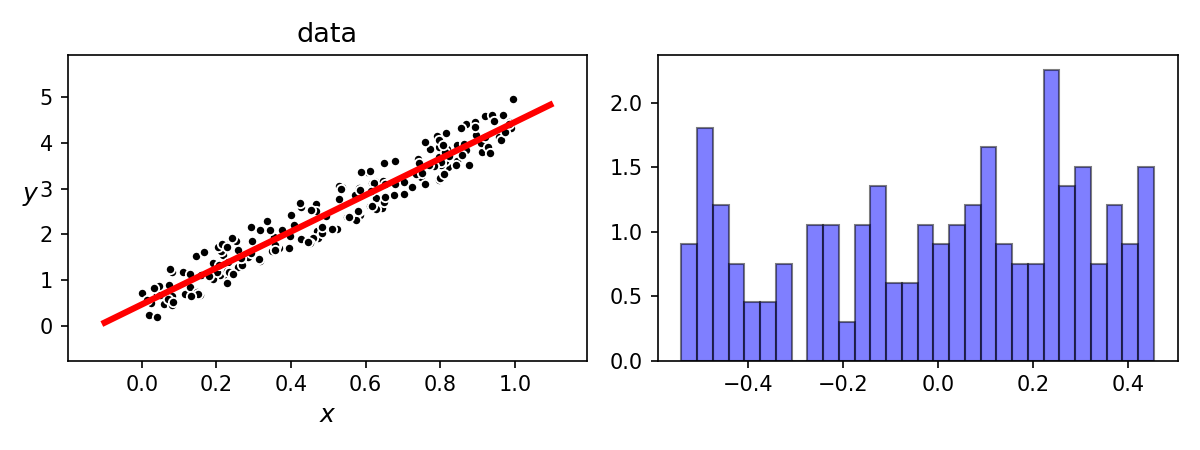

In [4]:
## This code cell will not be shown in the HTML version of this notebook
# make and load a simulated dataset with uniformly distributed noise
num_pts = 200
x = np.random.rand(num_pts)
y = 4*x + np.random.rand(num_pts) 
x.shape = (len(x),1)
y.shape = (len(y),1)
data = np.concatenate((x,y),axis = 1)

# produce demo
demo = regress_plotter.Visualizer(data)

# solve Least Squares
demo.run_algo(algo='newtons_method', w_init = np.random.randn(2,1), max_its = 1)

# visualize results
demo.error_hist(num_bins = 30)

<a id='bib_cell'></a>

### Data sources

[1] RS Nerem, DP Chambers, C Choe, and GT Mitchum. Estimating mean sea level change from the topex and jason altimeter missions. Marine Geodesy, 33(S1):435–446, 2010.

[2] Data taken from https://www.statcrunch.com/5.0/shareddata.php?keywords=Galton